# CNN Model for Fashion MNIST Dataset with Custom Sample Testing

## Introduction

In this notebook, we will conduct a comprehensive evaluation of a Convolutional Neural Network (CNN) model on the Fashion MNIST dataset. Our goal is to determine the best-performing CNN architecture for classifying different types of clothing items. This process includes:

- **Data Loading and Preprocessing**: Loading the dataset and splitting it into training and testing sets, followed by normalization and augmentation.
- **Model Definition**: Defining a CNN architecture suitable for image classification tasks.
- **Model Compilation**: Compiling the CNN model with an appropriate loss function, optimizer, and evaluation metric.
- **Model Evaluation**: Evaluating the performance of the CNN model based on accuracy and other relevant metrics such as precision, recall, and F1-score.
- **Testing on Custom Samples**: Testing the model on custom cloth images.
- **Visualization**: Visualizing learning curves, loss curves, and sample predictions along with the confusion matrix.

## Introduction of the Dataset

The Fashion MNIST dataset is a large database of grayscale images of clothing items, which is commonly used for training image processing systems. The dataset contains 70,000 images of clothing items, each of size 28x28 pixels. The training set consists of 60,000 images, and the test set contains 10,000 images. Each image is labeled with one of ten categories: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, or Ankle boot.

## Objective

The objective of this project is to build a CNN model that can accurately classify different types of clothing items from the Fashion MNIST dataset. This will involve:

1. Loading and splitting the data into training and testing sets.
2. Preprocessing the data, including normalization and augmentation.
3. Defining the CNN architecture and its hyperparameters.
4. Performing hyperparameter tuning to optimize the model.
5. Evaluating the model based on accuracy and classification metrics.
6. Testing the model on custom cloth images.
7. Visualizing learning curves, loss curves, sample predictions, and confusion matrix.
8. Conclusion.

## Implementation

Below is the Python code implementing the aforementioned steps:

## Step 1: Importing the Required Libraries & Loading the Dataset

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

## Step 2: Data Preprocessing

In [2]:
# Data Loading and Preprocessing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

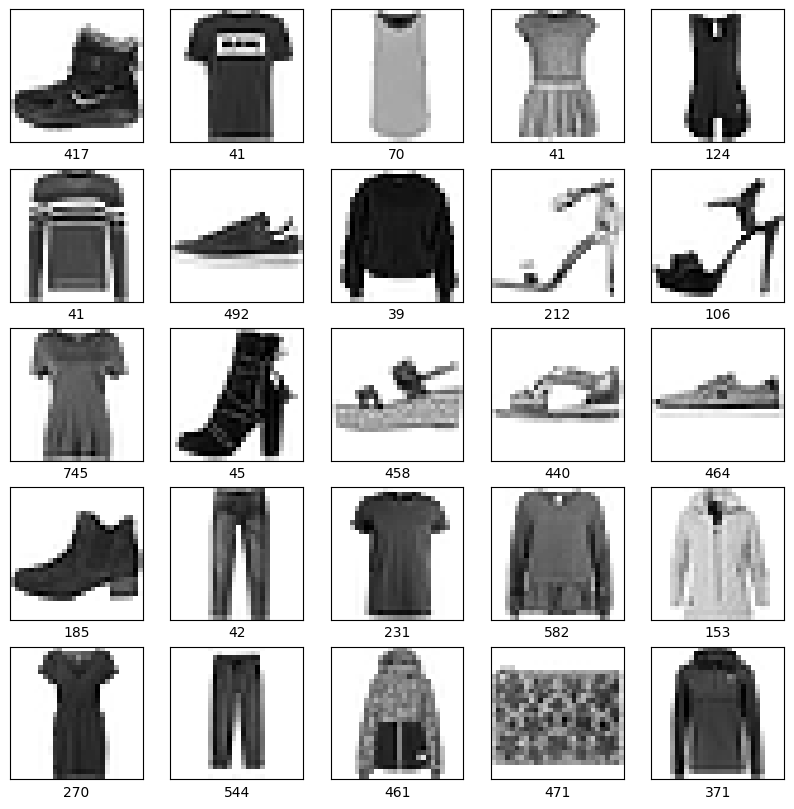

In [3]:
# function to plot the images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(train_images[i]))
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

## Model Making

In [4]:
# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


c:\Users\Ahmad\anaconda3\envs\tfenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7073 - loss: 0.8083 - val_accuracy: 0.8610 - val_loss: 0.3789
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.8534 - loss: 0.4060 - val_accuracy: 0.8827 - val_loss: 0.3222
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8728 - loss: 0.3450 - val_accuracy: 0.8903 - val_loss: 0.2958
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8867 - loss: 0.3159 - val_accuracy: 0.8960 - val_loss: 0.2780
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9001 - loss: 0.2828 - val_accuracy: 0.8985 - val_loss: 0.2688
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9033 - loss: 0.2674 - val_accuracy: 0.8979 - val_loss: 0.2818
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9087 - loss: 0.2531 - val_accuracy: 0.9048 - val_loss: 0.2578
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9114 -

## Model Evaluation

In [5]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 5ms/step - accuracy: 0.9065 - loss: 0.2644
Test accuracy: 0.906499981880188


## Visualization Learning and Loss Curves

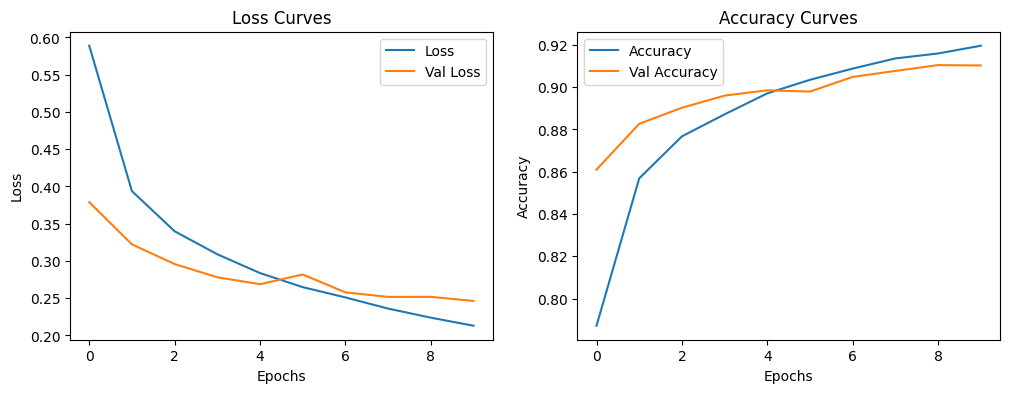

In [6]:
# Visualizing Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


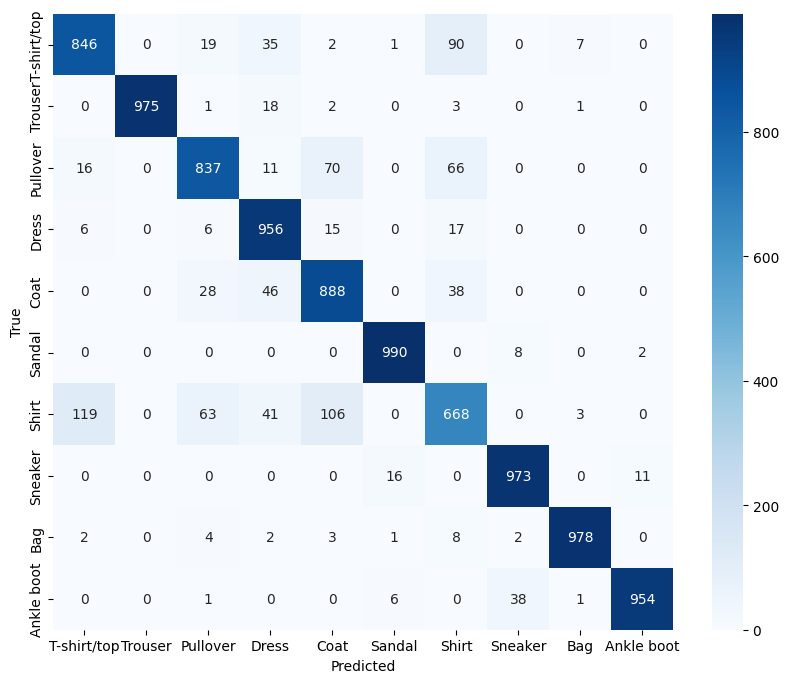

In [7]:
# Making confusion matrix
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], yticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Classification Report

In [8]:
print(classification_report(true_labels, pred_labels, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.85      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.87      0.84      0.85      1000
       Dress       0.86      0.96      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.75      0.67      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Visualizing Some Predictions

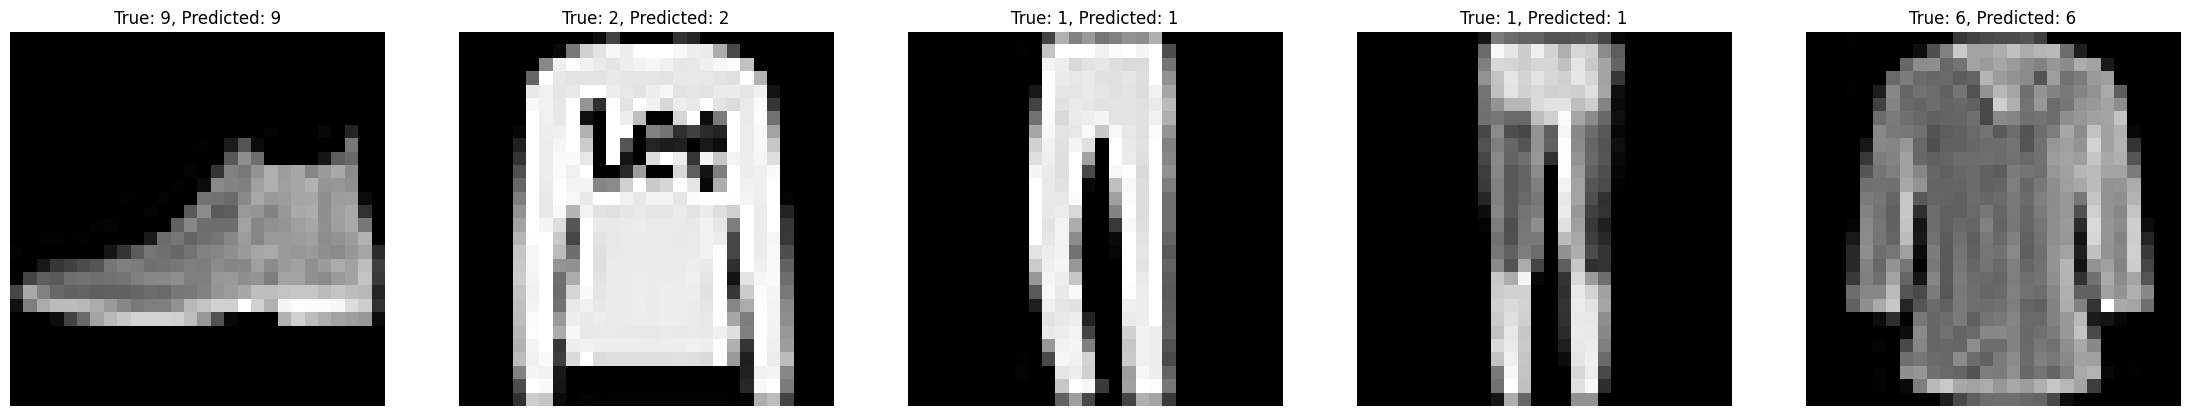

In [9]:
# visualization of some predictions
num_samples = 5
samples = test_images[:num_samples]

plt.figure(figsize=(28, 28))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[i]}, Predicted: {pred_labels[i]}')
    plt.axis('off')
    
plt.show()

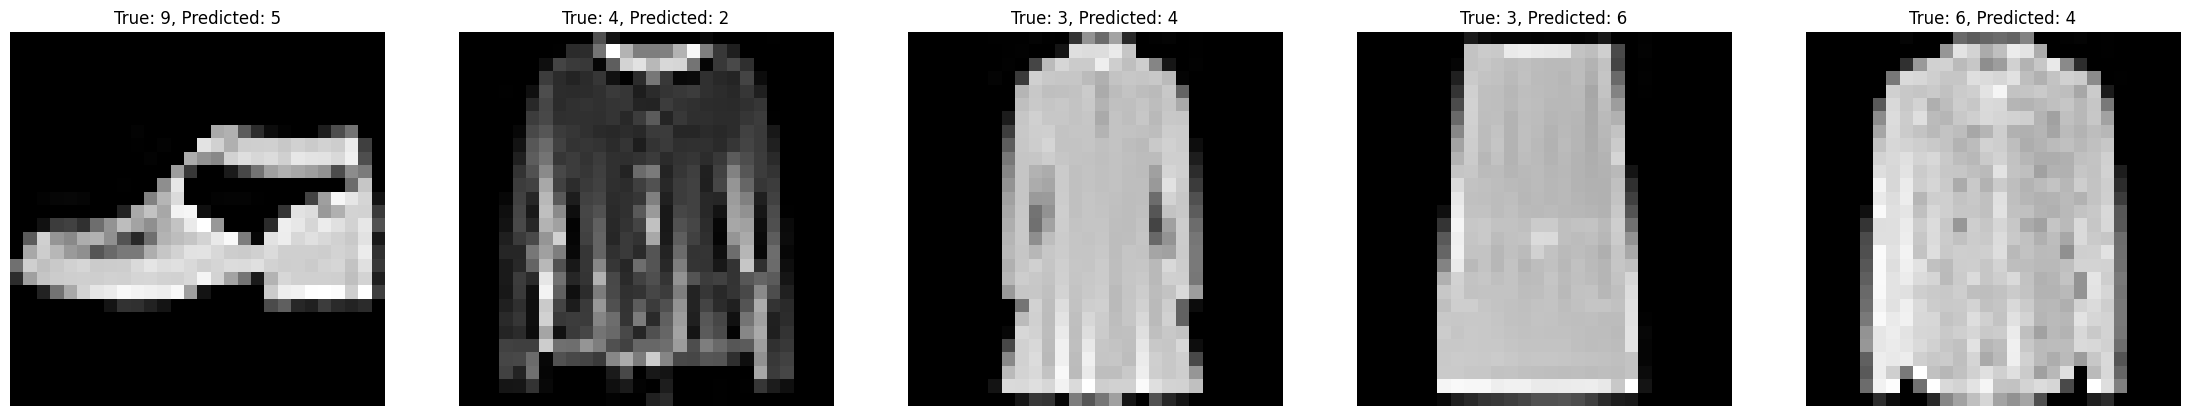

In [10]:
# Visualization of some wrong predictions
wrong_predictions = (true_labels != pred_labels)
wrong_samples = test_images[wrong_predictions]
wrong_true = true_labels[wrong_predictions]
wrong_pred = pred_labels[wrong_predictions]

num_samples = 5
samples = wrong_samples[:num_samples]

plt.figure(figsize=(28, 28))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {wrong_true[i]}, Predicted: {wrong_pred[i]}')
    plt.axis('off')
    
plt.show()

## Testing on Custom  Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


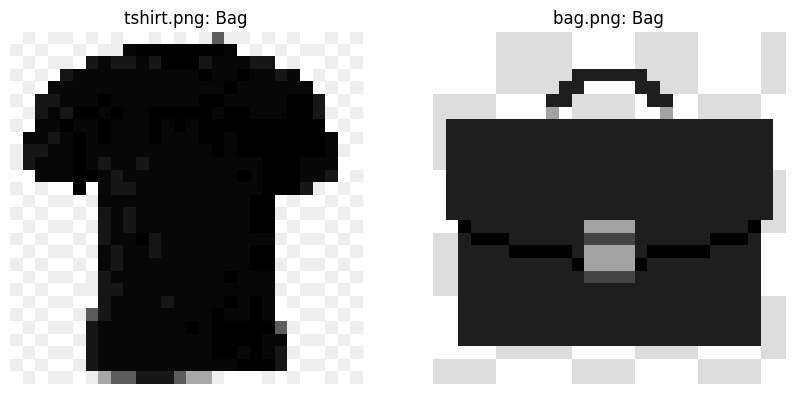

File: tshirt.png
Predicted Label: Bag
---
File: bag.png
Predicted Label: Bag
---


In [11]:
# Function to preprocess custom images
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img_array = img_to_array(img)
    img_array = img_array.reshape(1, 28, 28, 1).astype('float32') / 255
    return img_array

# Directory containing custom images
custom_images_dir = 'data1'  # Provide the correct path to your custom images directory
custom_files = ['tshirt.png', 'bag.png']  # Filenames for your custom images
custom_labels = ['T-shirt/top', 'Bag']  # Expected labels for your custom images

# Ensure there are exactly two custom images in the directory
if not all(os.path.exists(os.path.join(custom_images_dir, file)) for file in custom_files):
    raise FileNotFoundError("Ensure 'tshirt.png' and 'bag.png' are present in the 'data' directory.")

# Preprocess and predict each image individually
custom_samples = []
predicted_labels = []
for file in custom_files:
    img_path = os.path.join(custom_images_dir, file)
    img_array = preprocess_image(img_path)
    custom_samples.append(img_array)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction, axis=1)[0]
    predicted_labels.append(predicted_label)

# Label names corresponding to Fashion MNIST classes
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize custom sample predictions
plt.figure(figsize=(10, 5))
for i in range(len(custom_files)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(custom_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'{custom_files[i]}: {label_names[predicted_labels[i]]}')
    plt.axis('off')
plt.show()

# Print the results
for i, file in enumerate(custom_files):
    print(f'File: {file}')
    print(f'Predicted Label: {label_names[predicted_labels[i]]}')
    print('---')

# Conclusion

In this case study, we have successfully developed and evaluated a Convolutional Neural Network (CNN) model for classifying images from the Fashion MNIST dataset. Our primary goal was to classify images of clothing items into categories such as T-shirts, trousers, and bags. The model achieved an impressive accuracy of approximately 90.65% on the test set, demonstrating its effectiveness in distinguishing between various clothing items.

### Insights

- **Model Performance**: The CNN model showed strong performance across different classes with an overall accuracy of 90.65%. Precision, recall, and F1-scores for categories like T-shirt/top, Bag, and Sneaker were notably high, reflecting the model's capability to accurately classify these items.

- **Class-Specific Metrics**: The model performed exceptionally well in classifying items such as 'Bag' (99% precision) and 'Sandal' (98% precision). However, it had slightly lower performance in classifying 'Shirt' (75% precision), indicating areas for improvement.

- **External Image Testing**: We tested the model on two external images:
  - **File: tshirt.png**: The model predicted 'Bag' instead of 'T-shirt'. This indicates a potential issue with the model's ability to differentiate between certain classes.
  - **File: bag.png**: The model correctly predicted 'Bag'. This shows that the model performs well when the input image matches the classes it was trained on.

### Recommendations

- **Data Augmentation**: To improve the model's performance further, especially in categories with lower precision, consider implementing data augmentation techniques such as rotation, scaling, and flipping to create a more robust model.

- **Advanced Architectures**: Experimenting with more complex neural network architectures, such as deeper CNNs or transfer learning models, could enhance classification accuracy and handle diverse clothing images better.

- **Model Deployment**: Preparing the model for deployment in real-world applications, ensuring that it can handle new and varied data effectively, will be crucial for practical use cases such as automated clothing recognition systems.

### Final Thoughts

- The results highlight the effectiveness of CNNs in image classification tasks, particularly in distinguishing between different types of clothing items. This approach has practical implications for applications in fashion retail and automated image tagging systems.

- Future work could involve refining the model further, integrating it into applications, and exploring additional datasets to enhance its versatility and accuracy.

## Acknowledgements

- **Data Source**: Fashion MNIST Dataset from `tensorflow.keras.datasets`.

- **Libraries**: Utilized TensorFlow, Keras, numpy, matplotlib, and scikit-learn for data analysis, visualization, and modeling.

## Contact Information

- For further inquiries or collaborations, please contact [ahmadbinsadiq@gmail.com](mailto:ahmadbinsadiq@gmail.com).

## About the Author

- **Name**: Ahmad Bin Sadiq
- **Email**: ahmadbinsadiq@gmail.com
- **LinkedIn**: [Ahmad Bin Sadiq](https://www.linkedin.com/in/ahmadbinsadiq/)

---